In [16]:
import numpy as np 
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

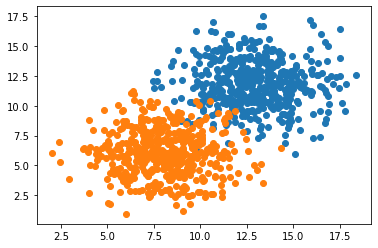

In [17]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [18]:
model = Sequential()
model.add(Dense(units = 1, input_shape=(2,), activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam,loss='binary_crossentropy',metrics=['accuracy'])
h = model.fit(x=X,y=y, verbose=1,batch_size=50, epochs=500,shuffle='true')

Epoch 1/500
20/20 [==============================] - 1s 2ms/step - loss: 1.0896 - accuracy: 0.6450
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.7347 - accuracy: 0.6870
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7390
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8400
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.9040
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.9480
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9540
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9620
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9590
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.9690
Epoch 11/

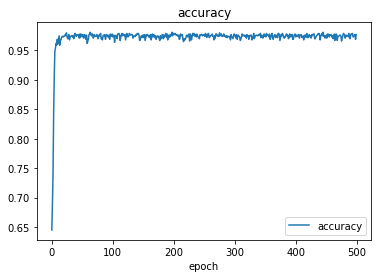

In [21]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

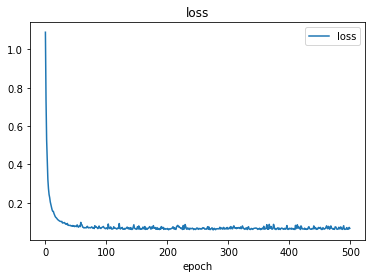

In [22]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [43]:
def plot_decision_boundary(X,y,model):
    x_span = np.linspace(min(X[:,0])-1,max(X[:,0])+1,50)
    y_span = np.linspace(min(X[:,1])-1,max(X[:,1])+1,50)
    xx, yy = np.meshgrid(x_span,y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)
    
    


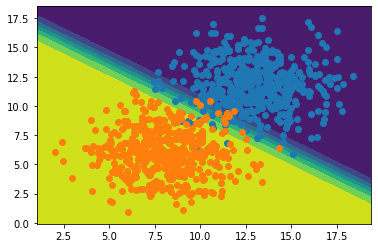

In [45]:
plot_decision_boundary(X,y,model)

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

prediction is : [[0.9999957]]


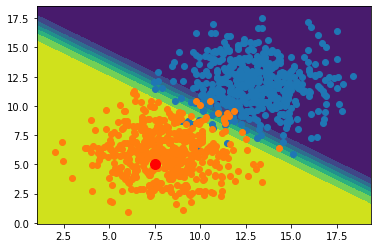

In [48]:
plot_decision_boundary(X,y,model)

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
#defining a point to check whether or not the prediction is correct
x = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker = "o", markersize=10, color="red")
print("prediction is :", prediction)